In [2]:
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
import numpy as np
import pandas as pd
import string

from sklearn.utils import shuffle

import re
#from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

import csv 
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
final = pd.read_csv('/content/drive/MyDrive/FYP/DataCleanedTotal.csv')

In [6]:
final

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Title,publisher,date,stock,Date,Open,High,Low,Close,Indicator
0,0,11752,1347410,apple hp top computerhardware stocks,webmaster,2010-03-02,QLGC,2010-03-02,7.50,7.53,7.42,7.46,NaN
1,1,11753,1759090,apple hp top computerhardware stocks,webmaster,2010-03-02,WDC,2010-03-02,7.50,7.53,7.42,7.46,NaN
2,2,10714,708092,apple little understood is bestrun company,webmaster,2010-03-03,GME,2010-03-03,7.47,7.50,7.43,7.48,NaN
3,3,8687,298902,cramers stop trading apple walmart,webmaster,2010-03-04,CIEN,2010-03-04,7.48,7.53,7.45,7.53,NaN
4,4,8693,1766992,mad money recap apple riding high with ipad up...,webmaster,2010-03-04,WFT,2010-03-04,7.48,7.53,7.45,7.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,12115,281,716745,tredje apfonden buys microsoft corp amazoncom ...,GuruFocus,2020-05-28,GOOGL,2020-05-28,79.19,80.86,78.91,79.56,Buy
12116,12116,278,4157,the zacks analyst blog highlights apple exxon ...,Zacks,2020-05-28,AAPL,2020-05-28,79.19,80.86,78.91,79.56,Buy
12117,12117,279,366763,the zacks analyst blog highlights apple exxon ...,Zacks,2020-05-28,CSCO,2020-05-28,79.19,80.86,78.91,79.56,Buy
12118,12118,280,591035,tredje apfonden buys microsoft corp amazoncom ...,GuruFocus,2020-05-28,FB,2020-05-28,79.19,80.86,78.91,79.56,Buy


In [7]:
final = final[final['Indicator'].notna()]

In [8]:
final

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Title,publisher,date,stock,Date,Open,High,Low,Close,Indicator
16,16,7188,201832,apple ipad launch looking good,webmaster,2010-03-15,BKS,2010-03-15,8.05,8.05,7.87,7.99,Buy
17,17,11972,1759086,apples imac is desktop savior,webmaster,2010-03-17,WDC,2010-03-17,8.03,8.09,7.97,8.00,Hold
18,18,7764,294332,mustsee charts apple ge china unicom,webmaster,2010-03-25,CHU,2010-03-25,8.25,8.25,8.08,8.09,Hold
19,19,7763,286411,apple analysts upgrades downgrades,webmaster,2010-03-25,CHH,2010-03-25,8.25,8.25,8.08,8.09,Hold
20,20,7762,237073,apple analysts upgrades downgrades,webmaster,2010-03-25,BTU,2010-03-25,8.25,8.25,8.08,8.09,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,12115,281,716745,tredje apfonden buys microsoft corp amazoncom ...,GuruFocus,2020-05-28,GOOGL,2020-05-28,79.19,80.86,78.91,79.56,Buy
12116,12116,278,4157,the zacks analyst blog highlights apple exxon ...,Zacks,2020-05-28,AAPL,2020-05-28,79.19,80.86,78.91,79.56,Buy
12117,12117,279,366763,the zacks analyst blog highlights apple exxon ...,Zacks,2020-05-28,CSCO,2020-05-28,79.19,80.86,78.91,79.56,Buy
12118,12118,280,591035,tredje apfonden buys microsoft corp amazoncom ...,GuruFocus,2020-05-28,FB,2020-05-28,79.19,80.86,78.91,79.56,Buy


In [9]:
final = final.rename(columns={'Title': 'Processed', 'Indicator': 'sentiment_type'})

In [10]:
final

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Processed,publisher,date,stock,Date,Open,High,Low,Close,sentiment_type
16,16,7188,201832,apple ipad launch looking good,webmaster,2010-03-15,BKS,2010-03-15,8.05,8.05,7.87,7.99,Buy
17,17,11972,1759086,apples imac is desktop savior,webmaster,2010-03-17,WDC,2010-03-17,8.03,8.09,7.97,8.00,Hold
18,18,7764,294332,mustsee charts apple ge china unicom,webmaster,2010-03-25,CHU,2010-03-25,8.25,8.25,8.08,8.09,Hold
19,19,7763,286411,apple analysts upgrades downgrades,webmaster,2010-03-25,CHH,2010-03-25,8.25,8.25,8.08,8.09,Hold
20,20,7762,237073,apple analysts upgrades downgrades,webmaster,2010-03-25,BTU,2010-03-25,8.25,8.25,8.08,8.09,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,12115,281,716745,tredje apfonden buys microsoft corp amazoncom ...,GuruFocus,2020-05-28,GOOGL,2020-05-28,79.19,80.86,78.91,79.56,Buy
12116,12116,278,4157,the zacks analyst blog highlights apple exxon ...,Zacks,2020-05-28,AAPL,2020-05-28,79.19,80.86,78.91,79.56,Buy
12117,12117,279,366763,the zacks analyst blog highlights apple exxon ...,Zacks,2020-05-28,CSCO,2020-05-28,79.19,80.86,78.91,79.56,Buy
12118,12118,280,591035,tredje apfonden buys microsoft corp amazoncom ...,GuruFocus,2020-05-28,FB,2020-05-28,79.19,80.86,78.91,79.56,Buy


NAIVE BAYES CLASSIFIER USING COUNT VECTORIZER AND TFIDF VECTORIZER

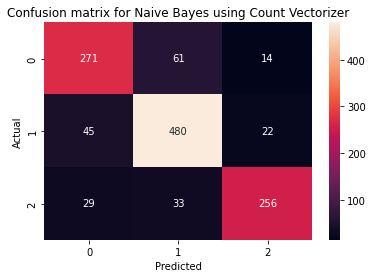

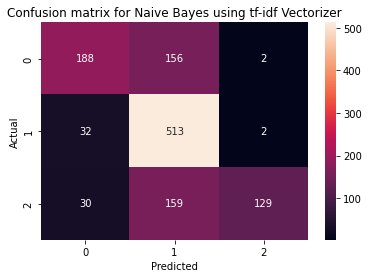

In [12]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
x_train, x_test, y_train, y_test = train_test_split(final[['Processed']], 
                                                    final['sentiment_type'], 
                                                    test_size=0.10, 
                                                    random_state=0)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
comment_matrix = vectorizer.fit_transform(x_train['Processed'])

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(use_idf=True, sublinear_tf=True)
comment_matrix1 = vectorizer1.fit_transform(x_train['Processed'])

from sklearn.naive_bayes import MultinomialNB
comment_classifier = MultinomialNB().fit(comment_matrix, y_train)
comment_classifier1 = MultinomialNB().fit(comment_matrix1, y_train)

from sklearn import metrics
test_vector = vectorizer.transform(x_test['Processed'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)

test_vector1 = vectorizer1.transform(x_test['Processed'])
result1 = comment_classifier1.predict(test_vector1)
confuse1 = metrics.confusion_matrix(y_test, result1)

fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix for Naive Bayes using Count Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(confuse1, annot = True, fmt='d')
plt.title("Confusion matrix for Naive Bayes using tf-idf Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# count
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')
accuracy_score = metrics.accuracy_score(y_test, result)
print("Evaluation metrics for Naive Bayes using Count Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Accuracy: {0:0.3f}'.format(accuracy_score))

# tfidf
F1_score1 = metrics.f1_score(y_test, result1,average='weighted')
precision_score1= metrics.precision_score(y_test, result1,average='weighted')
recall_score1 = metrics.recall_score(y_test, result1,average='weighted')
accuracy_score1 = metrics.accuracy_score(y_test, result1)
print("Evaluation metrics for Naive Bayes using tf-idf Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score1))
print('Precision score: {0:0.3f}'.format(precision_score1))
print('Recall score: {0:0.3f}'.format(recall_score1))
print('Accuracy: {0:0.3f}'.format(accuracy_score1))

Evaluation metrics for Naive Bayes using Count Vectorizer
F1 score: 0.831
Precision score: 0.832
Recall score: 0.832
Accuracy: 0.832
Evaluation metrics for Naive Bayes using tf-idf Vectorizer
F1 score: 0.668
Precision score: 0.749
Recall score: 0.685
Accuracy: 0.685


In [11]:
from sklearn.model_selection import cross_val_score
import time
#count
precision = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='precision_weighted').max() 
recall = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='recall_weighted').max()
f1 = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='f1_weighted').max()
accuracy = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='accuracy').max()
print("Evaluation metrics for Naive Bayes using Count Vectorizer")
print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)
print("Accuracy:",accuracy)
#tfidf
precision1 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='precision_weighted').max() 
recall1 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='recall_weighted').max()
f11 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='f1_weighted').max()
accuracy1 = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='accuracy').max()
print("Evaluation metrics for Naive Bayes using tf-idf Vectorizer")
print("Precision:",precision1) 
print("Recall:",recall1) 
print("F1 score:",f11)
print("Accuracy:",accuracy1)

Evaluation metrics for Naive Bayes using Count Vectorizer
Precision: 0.6140385633741394
Recall: 0.5761316872427984
F1 score: 0.557392149347101
Accuracy: 0.5761316872427984
Evaluation metrics for Naive Bayes using tf-idf Vectorizer
Precision: 0.7078530926879888
Recall: 0.512396694214876
F1 score: 0.41714372809023015
Accuracy: 0.5761316872427984


In [12]:
comment_matrix

<10893x33161 sparse matrix of type '<class 'numpy.int64'>'
	with 197866 stored elements in Compressed Sparse Row format>

SUPPORT VECTOR MACHINE CLASSIFIER USING COUNT VECTORIZER AND TFIDF VECTORIZER

In [17]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
nfolds=3
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.05, 0.1, 0.15, 0.20, 0.25]
degrees = [0, 1, 2, 3, 4, 5, 6]
kernels = ['rbf', 'linear', 'poly']
param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees, 'kernel' : kernels}

grid_search = GridSearchCV(svm.SVC(), param_grid, cv = nfolds)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

{'C': 1, 'degree': 2, 'gamma': 0.25, 'kernel': 'poly'}

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
nfolds=3
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.05, 0.1, 0.15, 0.20, 0.25]
degrees = [0, 1, 2, 3, 4, 5, 6]
kernels = ['rbf', 'linear', 'poly']
param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees, 'kernel' : kernels}

grid_search = GridSearchCV(svm.SVC(), param_grid, cv = nfolds)
grid_search.fit(test_vector1, y_test)
grid_search.best_params_

{'C': 10, 'degree': 2, 'gamma': 0.25, 'kernel': 'poly'}

In [20]:
from sklearn import svm

# SVM = svm.SVC(C=1, kernel='poly', gamma=0.25, degree=2).fit(comment_matrix, y_train)
# SVM1 = svm.SVC(C=10, kernel='poly', gamma=0.05, degree=2).fit(comment_matrix1, y_train)
SVM = svm.SVC().fit(comment_matrix, y_train)
SVM1 = svm.SVC().fit(comment_matrix1, y_train)
test_vector = vectorizer.transform(x_test['Processed'])
result = SVM.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)

test_vector1 = vectorizer1.transform(x_test['Processed'])
result1 = SVM1.predict(test_vector1)
confuse1 = metrics.confusion_matrix(y_test, result1)

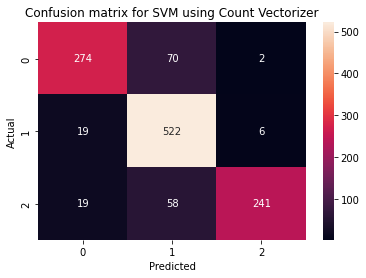

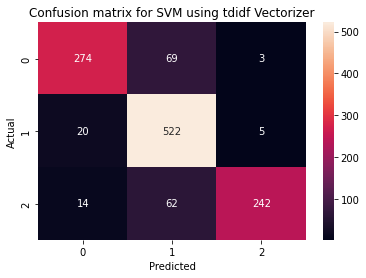

In [21]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix for SVM using Count Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(confuse1, annot = True, fmt='d')
plt.title("Confusion matrix for SVM using tdidf Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# count
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')
print("Evaluation metrics for SVM using Count Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))

# tfidf
F1_score1 = metrics.f1_score(y_test, result1,average='weighted')
precision_score1= metrics.precision_score(y_test, result1,average='weighted')
recall_score1 = metrics.recall_score(y_test, result1,average='weighted')
print("Evaluation metrics for SVM using tf-idf Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score1))
print('Precision score: {0:0.3f}'.format(precision_score1))
print('Recall score: {0:0.3f}'.format(recall_score1))

Evaluation metrics for SVM using Count Vectorizer
F1 score: 0.855
Precision score: 0.868
Recall score: 0.856
Evaluation metrics for SVM using tf-idf Vectorizer
F1 score: 0.856
Precision score: 0.869
Recall score: 0.857


In [23]:
from sklearn.model_selection import cross_val_score
import time
#count
precision = cross_val_score(SVM,test_vector,y_test, cv=5, scoring='precision_weighted').mean() 
recall = cross_val_score(SVM,test_vector,y_test, cv=5, scoring='recall_weighted').mean()
f1 = cross_val_score(SVM,test_vector,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for SVM using Count Vectorizer")
print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)
#tfidf
precision1 = cross_val_score(SVM1,test_vector1,y_test, cv=5, scoring='precision_weighted').mean() 
recall1 = cross_val_score(SVM1,test_vector1,y_test, cv=5, scoring='recall_weighted').mean()
f11 = cross_val_score(SVM1,test_vector1,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for SVM using tf-idf Vectorizer")
print("Precision:",precision1) 
print("Recall:",recall1) 
print("F1 score:",f11)

Evaluation metrics for SVM using Count Vectorizer
Precision: 0.673862901516577
Recall: 0.5598714416896236
F1 score: 0.5041123703295807
Evaluation metrics for SVM using tf-idf Vectorizer
Precision: 0.6929405125957808
Recall: 0.5615141312111008
F1 score: 0.5023960418668787


K- NEAREST NEIGHBOURS CLASSIFIER USING COUNT VECTORIZER AND TFIDF VECTORIZER

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

metrics = ['euclidean', 'manhattan', 'cosine']
neighbors = [1, 5, 10, 15, 20, 25, 30]
leaf_size = [1, 2, 3]
weight = ['uniform', 'distance']
param_grid = {'metric' : metrics, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

metrics = ['euclidean', 'manhattan', 'cosine']
neighbors = [1, 5, 10, 15, 20, 25, 30]
leaf_size = [1, 2, 3]
weight = ['uniform', 'distance']
param_grid = {'metric' : metrics, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid_search.fit(test_vector1, y_test)
grid_search.best_params_

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# knn_model = KNeighborsClassifier(n_neighbors=30, metric='manhattan', leaf_size=1, weights='uniform')
knn_model = KNeighborsClassifier()
knn_model.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['Processed'])
result = knn_model.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)

# knn_model1 = KNeighborsClassifier(n_neighbors=25, metric='manhattan', leaf_size=1, weights='distance')
knn_model1 = KNeighborsClassifier()
knn_model1.fit(comment_matrix1, y_train)

test_vector1 = vectorizer1.transform(x_test['Processed'])
result1 = knn_model1.predict(test_vector1)
confuse1 = metrics.confusion_matrix(y_test, result1)

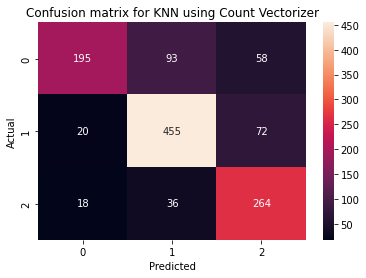

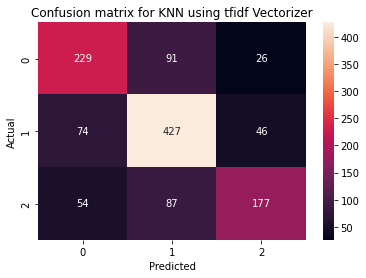

In [25]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix for KNN using Count Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
sns.heatmap(confuse1, annot = True, fmt='d')
plt.title("Confusion matrix for KNN using tfidf Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# count 
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')
print("Evaluation metrics for KNN using Count Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))

# tfidf
F1_score1 = metrics.f1_score(y_test, result1,average='weighted')
precision_score1= metrics.precision_score(y_test, result1,average='weighted')
recall_score1 = metrics.recall_score(y_test, result1,average='weighted')
print("Evaluation metrics for KNN using tf-idf Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score1))
print('Precision score: {0:0.3f}'.format(precision_score1))
print('Recall score: {0:0.3f}'.format(recall_score1))

Evaluation metrics for KNN using Count Vectorizer
F1 score: 0.751
Precision score: 0.767
Recall score: 0.755
Evaluation metrics for KNN using tf-idf Vectorizer
F1 score: 0.685
Precision score: 0.689
Recall score: 0.688


In [ ]:
from sklearn.model_selection import cross_val_score
import time
#count
precision = cross_val_score(knn_model,test_vector,y_test, cv=5, scoring='precision_weighted').mean() 
recall = cross_val_score(knn_model,test_vector,y_test, cv=5, scoring='recall_weighted').mean()
f1 = cross_val_score(knn_model,test_vector,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for KNN using Count Vectorizer")
print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)
#tfidf
precision1 = cross_val_score(knn_model1,test_vector1,y_test, cv=5, scoring='precision_weighted').mean() 
recall1 = cross_val_score(knn_model1,test_vector1,y_test, cv=5, scoring='recall_weighted').mean()
f11 = cross_val_score(knn_model1,test_vector1,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for KNN using tf-idf Vectorizer")
print("Precision:",precision1) 
print("Recall:",recall1) 
print("F1 score:",f11)

DECISION TREE CLASSIFIER USING COUNT VECTORIZER AND TFIDF VECTORIZER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier() 

param_grid = { 
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': ['auto','sqrt','log2']
}

grid_search = GridSearchCV(clf, param_grid, cv= 5)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf1 = DecisionTreeClassifier() 

param_grid = { 
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': ['auto','sqrt','log2']
}

grid_search = GridSearchCV(clf1, param_grid, cv= 5)
grid_search.fit(test_vector1, y_test)
grid_search.best_params_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

clf=DecisionTreeClassifier(criterion='entropy',splitter='random',max_features='sqrt')

comment_classifier = clf.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['Processed'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)


clf1=DecisionTreeClassifier(criterion='gini',splitter='random',max_features='sqrt')

comment_classifier1 = clf1.fit(comment_matrix1, y_train)

test_vector1 = vectorizer1.transform(x_test['Processed'])
result1 = comment_classifier1.predict(test_vector1)
confuse1 = metrics.confusion_matrix(y_test, result1)

In [ ]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix for Decision Tree using Count Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
sns.heatmap(confuse1, annot = True, fmt='d')
plt.title("Confusion matrix for Decision Tree using tfidf Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# count
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')
print("Evaluation metrics for DT using Count Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))

# tfidf
F1_score1 = metrics.f1_score(y_test, result1,average='weighted')
precision_score1= metrics.precision_score(y_test, result1,average='weighted')
recall_score1 = metrics.recall_score(y_test, result1,average='weighted')
print("Evaluation metrics for DT using tf-idf Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score1))
print('Precision score: {0:0.3f}'.format(precision_score1))
print('Recall score: {0:0.3f}'.format(recall_score1))

In [ ]:
from sklearn.model_selection import cross_val_score
import time
#count
precision = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='precision_weighted').mean() 
recall = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='recall_weighted').mean()
f1 = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for DT using Count Vectorizer")
print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)
#tfidf
precision1 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='precision_weighted').mean() 
recall1 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='recall_weighted').mean()
f11 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for DT using tf-idf Vectorizer")
print("Precision:",precision1) 
print("Recall:",recall1) 
print("F1 score:",f11)

ENSEMBLE LEARNING CLASSIFIER (RANDOM FOREST) USING COUNT VECTORIZER AND TFIDF VECTORIZER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [100, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(clf, param_grid, cv= 3)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf1 = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [100, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(clf1, param_grid, cv= 3)
grid_search.fit(test_vector1, y_test)
grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(bootstrap=False,max_features='auto',n_estimators=250)

comment_classifier = clf.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['Processed'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)

clf1=RandomForestClassifier(bootstrap=True,max_features='sqrt',n_estimators=250)

comment_classifier1 = clf1.fit(comment_matrix1, y_train)

test_vector1 = vectorizer1.transform(x_test['Processed'])
result1 = comment_classifier1.predict(test_vector1)
confuse1 = metrics.confusion_matrix(y_test, result1)

In [ ]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix for Random Forest using Count Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
sns.heatmap(confuse1, annot = True, fmt='d')
plt.title("Confusion matrix for Random Forest using tfidf Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# count 
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')
print("Evaluation metrics for RF using Count Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))

# tfidf
F1_score1 = metrics.f1_score(y_test, result1,average='weighted')
precision_score1= metrics.precision_score(y_test, result1,average='weighted')
recall_score1 = metrics.recall_score(y_test, result1,average='weighted')
print("Evaluation metrics for RF using tf-idf Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score1))
print('Precision score: {0:0.3f}'.format(precision_score1))
print('Recall score: {0:0.3f}'.format(recall_score1))

In [ ]:
from sklearn.model_selection import cross_val_score
import time
#count
precision = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='precision_weighted').mean() 
recall = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='recall_weighted').mean()
f1 = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for RF using Count Vectorizer")
print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)
#tfidf
precision1 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='precision_weighted').mean() 
recall1 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='recall_weighted').mean()
f11 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for RF using tf-idf Vectorizer")
print("Precision:",precision1) 
print("Recall:",recall1) 
print("F1 score:",f11)

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(10,20), (10,20,30)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(mlp, param_grid, cv= 3)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


mlp1 = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(10,20), (10,20,30)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(mlp1, param_grid, cv= 3)
grid_search.fit(test_vector1, y_test)
grid_search.best_params_

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics



from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
comment_matrix = vectorizer.fit_transform(x_train['Processed'])

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(use_idf=True, sublinear_tf=True)
comment_matrix1 = vectorizer1.fit_transform(x_train['Processed'])

mlp = MLPClassifier(activation = 'relu', solver = 'adam' , alpha =0.05, learning_rate = 'adaptive')

comment_classifier = mlp.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['Processed'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)

mlp1 = MLPClassifier( activation = 'relu', solver = 'adam' , alpha =0.05, learning_rate = 'constant')

comment_classifier1 = mlp1.fit(comment_matrix1, y_train)

test_vector1 = vectorizer1.transform(x_test['Processed'])
result1 = comment_classifier1.predict(test_vector1)
confuse1 = metrics.confusion_matrix(y_test, result1)

In [ ]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix for MLP using Count Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
sns.heatmap(confuse1, annot = True, fmt='d')
plt.title("Confusion matrix for MLP using tfidf Vectorizer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# count 
F1_score = metrics.f1_score(y_test, result,average='weighted')
precision_score= metrics.precision_score(y_test, result,average='weighted')
recall_score = metrics.recall_score(y_test, result,average='weighted')
print("Evaluation metrics for MLP using Count Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))

# tfidf
F1_score1 = metrics.f1_score(y_test, result1,average='weighted')
precision_score1= metrics.precision_score(y_test, result1,average='weighted')
recall_score1 = metrics.recall_score(y_test, result1,average='weighted')
print("Evaluation metrics for MLP using tf-idf Vectorizer")
print('F1 score: {0:0.3f}'.format(F1_score1))
print('Precision score: {0:0.3f}'.format(precision_score1))
print('Recall score: {0:0.3f}'.format(recall_score1))

In [ ]:
from sklearn.model_selection import cross_val_score
import time
#count
precision = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='precision_weighted').mean() 
recall = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='recall_weighted').mean()
f1 = cross_val_score(comment_classifier,test_vector,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for MLP using Count Vectorizer")
print("Precision:",precision) 
print("Recall:",recall) 
print("F1 score:",f1)
#tfidf
precision1 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='precision_weighted').mean() 
recall1 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='recall_weighted').mean()
f11 = cross_val_score(comment_classifier1,test_vector1,y_test, cv=5, scoring='f1_weighted').mean()
print("Evaluation metrics for MLP using tf-idf Vectorizer")
print("Precision:",precision1) 
print("Recall:",recall1) 
print("F1 score:",f11)